In [3]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab05.ok')

Assignment: Simulations
OK, version v1.18.1



# Lab 5: Simulations

Welcome to Lab 5! 

We will go over [iteration](https://www.inferentialthinking.com/chapters/09/2/Iteration.html) and [simulations](https://www.inferentialthinking.com/chapters/09/3/Simulation.html), as well as introduce the concept of [randomness](https://www.inferentialthinking.com/chapters/09/Randomness.html) and [conditional probability](https://www.inferentialthinking.com/chapters/18/Updating_Predictions.html).

The data used in this lab will contain salary data and other statistics for basketball players from the 2014-2015 NBA season. This data was collected from the following sports analytic sites: [Basketball Reference](http://www.basketball-reference.com) and [Spotrac](http://www.spotrac.com).

**Lab Queue**: You can find the Lab Queue at [lab.data8.org](https://lab.data8.org/). You can add yourself to the queue in order to get help from a GSI or learning assistant! Please feel free to add yourself to the queue whenever you feel stuck or need some further clarification -- we are more than happy to help. When you are ready to be checked off after submitting your lab, add yourself to the queue. 

First, set up the tests and imports by running the cell below.

In [4]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Don't change this cell; just run it. 
from client.api.notebook import Notebook
ok = Notebook('lab05.ok')

Assignment: Simulations
OK, version v1.18.1



## 1. Nachos and Conditionals

In Python, the boolean data type contains only two unique values:  `True` and `False`. Expressions containing comparison operators such as `<` (less than), `>` (greater than), and `==` (equal to) evaluate to Boolean values. A list of common comparison operators can be found below!

<img src="comparisons.png">

Run the cell below to see an example of a comparison operator in action.

In [5]:
3 > 1 + 1

True

We can even assign the result of a comparison operation to a variable.

In [6]:
result = 10 / 2 == 5
result

True

Arrays are compatible with comparison operators. The output is an array of boolean values.

In [7]:
make_array(1, 5, 7, 8, 3, -1) > 3

array([False,  True,  True,  True, False, False])

One day, when you come home after a long week, you see a hot bowl of nachos waiting on the dining table! Let's say that whenever you take a nacho from the bowl, it will either have only **cheese**, only **salsa**, **both** cheese and salsa, or **neither** cheese nor salsa (a sad tortilla chip indeed). 

Let's try and simulate taking nachos from the bowl at random using the function, `np.random.choice(...)`.

### `np.random.choice`

`np.random.choice` picks one item at random from the given array. It is equally likely to pick any of the items. Run the cell below several times, and observe how the results change.

In [10]:
nachos = make_array('cheese', 'salsa', 'both', 'neither')
np.random.choice(nachos)

'salsa'

To repeat this process multiple times, pass in an int `n` as the second argument to return `n` different random choices. By default, `np.random.choice` samples **with replacement** and returns an *array* of items. 

Run the next cell to see an example of sampling with replacement 10 times from the `nachos` array.

In [11]:
np.random.choice(nachos, 10)

array(['neither', 'neither', 'cheese', 'salsa', 'both', 'cheese', 'both',
       'salsa', 'salsa', 'both'], dtype='<U7')

To count the number of times a certain type of nacho is randomly chosen, we can use `np.count_nonzero`

### `np.count_nonzero`

`np.count_nonzero` counts the number of non-zero values that appear in an array. When an array of boolean values are passed through the function, it will count the number of `True` values (remember that in Python, `True` is coded as 1 and `False` is coded as 0.)

Run the next cell to see an example that uses `np.count_nonzero`.

In [12]:
np.count_nonzero(make_array(True, False, False, True, True))

3

**Question 1.** Assume we took ten nachos at random, and stored the results in an array called `ten_nachos` as done below. Find the number of nachos with only cheese using code (do not hardcode the answer).  

*Hint:* Our solution involves a comparison operator (e.g. `=`, `<`, ...) and the `np.count_nonzero` method.

<!--
BEGIN QUESTION
name: q11
-->

In [13]:
ten_nachos = make_array('neither', 'cheese', 'both', 'both', 'cheese', 'salsa', 'both', 'neither', 'cheese', 'both')
number_cheese = np.count_nonzero(ten_nachos=='cheese')
number_cheese

3

In [14]:
ok.grade("q11");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Conditional Statements**

A conditional statement is a multi-line statement that allows Python to choose among different alternatives based on the truth value of an expression.

Here is a basic example.

```
def sign(x):
    if x > 0:
        return 'Positive'
    else:
        return 'Negative'
```

If the input `x` is greater than `0`, we return the string `'Positive'`. Otherwise, we return `'Negative'`.

If we want to test multiple conditions at once, we use the following general format.

```
if <if expression>:
    <if body>
elif <elif expression 0>:
    <elif body 0>
elif <elif expression 1>:
    <elif body 1>
...
else:
    <else body>
```

Only the body for the first conditional expression that is true will be evaluated. Each `if` and `elif` expression is evaluated and considered in order, starting at the top. `elif` can only be used if an `if` clause precedes it. As soon as a true value is found, the corresponding body is executed, and the rest of the conditional statement is skipped. If none of the `if` or `elif` expressions are true, then the `else body` is executed. 

For more examples and explanation, refer to the section on conditional statements [here](https://www.inferentialthinking.com/chapters/09/1/conditional-statements.html).

**Question 2.** Complete the following conditional statement so that the string `'More please'` is assigned to the variable `say_please` if the number of nachos with cheese in `ten_nachos` is less than `5`. Use the if statement to do this (do not directly reassign the variable `say_please`). 

*Hint*: You should be using `number_cheese` from Question 1.

<!--
BEGIN QUESTION
name: q12
-->

In [15]:
say_please = '?'

if np.count_nonzero(ten_nachos == 'cheese') < 5:
    say_please = 'More please'
say_please

'More please'

In [16]:
ok.grade("q12");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Write a function called `nacho_reaction` that returns a reaction (as a string) based on the type of nacho passed in as an argument. Use the table below to match the nacho type to the appropriate reaction.

<img src="nacho_reactions.png">

*Hint:* If you're failing the test, double check the spelling of your reactions.

<!--
BEGIN QUESTION
name: q13
-->

In [21]:
def nacho_reaction(nacho):
    if nacho == "cheese":
        return "Cheesy!"
    elif nacho == 'salsa' :
        return "Spicy!"
    elif nacho == 'both' :
        return "Wow!"
    elif nacho == 'neither' :
        return "Meh."

spicy_nacho = nacho_reaction('salsa')
spicy_nacho

'Spicy!'

In [22]:
ok.grade("q13");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Create a table `ten_nachos_reactions` that consists of the nachos in `ten_nachos` as well as the reactions for each of those nachos. The columns should be called `Nachos` and `Reactions`.

*Hint:* Use the `apply` method. 

<!--
BEGIN QUESTION
name: q14
-->

In [28]:
ten_nachos_tbl = Table().with_column('Nachos', ten_nachos)
ten_nachos_reactions = ten_nachos_tbl.with_column('Reactions', ten_nachos_tbl.apply(nacho_reaction, 'Nachos'))
ten_nachos_reactions

Nachos,Reactions
neither,Meh.
cheese,Cheesy!
both,Wow!
both,Wow!
cheese,Cheesy!
salsa,Spicy!
both,Wow!
neither,Meh.
cheese,Cheesy!
both,Wow!


In [29]:
ok.grade("q14");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Using code, find the number of 'Wow!' reactions for the nachos in `ten_nachos_reactions`.

<!--
BEGIN QUESTION
name: q15
-->

In [32]:
number_wow_reactions = np.count_nonzero(ten_nachos_reactions.column(1) == 'Wow!')
number_wow_reactions

4

In [33]:
ok.grade("q15");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Simulations and For Loops
Using a `for` statement, we can perform a task multiple times. This is known as iteration. The general structure of a for loop is:

`for <place_holder> in <array>:` followed by indented lines of code that are repeated for each element of the `array` being iterated over. You can read more about for loops [here](https://www.inferentialthinking.com/chapters/09/2/Iteration.html). 

One use of iteration is to loop through a set of values. For instance, we can print out all of the colors of the rainbow.

In [34]:
rainbow = make_array("red", "orange", "yellow", "green", "blue", "indigo", "violet")

for color in rainbow:
    print(color)

red
orange
yellow
green
blue
indigo
violet


We can see that the indented part of the `for` loop, known as the body, is executed once for each item in `rainbow`. The name `color` is assigned to the next value in `rainbow` at the start of each iteration. Note that the name `color` is arbitrary; we could easily have named it something else. The important thing is we stay consistent throughout the `for` loop. 

In [35]:
for another_name in rainbow:
    print(another_name)

red
orange
yellow
green
blue
indigo
violet


In general, however, we would like the variable name to be somewhat informative. 

**Question 1.** In the following cell, we've loaded the text of _Pride and Prejudice_ by Jane Austen, split it into individual words, and stored these words in an array `p_and_p_words`. Using a `for` loop, assign `longer_than_five` to the number of words in the novel that are more than 5 letters long.

*Hint*: You can find the number of letters in a word with the `len` function.

<!--
BEGIN QUESTION
name: q21
-->

In [38]:
austen_string = open('Austen_PrideAndPrejudice.txt', encoding='utf-8').read()
p_and_p_words = np.array(austen_string.split())

longer_than_five = 0

# a for loop would be useful here
for word in p_and_p_words:
    if len(word) > 5:
        longer_than_five += 1

longer_than_five

35453

In [39]:
ok.grade("q21");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Using a simulation with 10,000 trials, assign num_different to the number of times, in 10,000 trials, that two words picked uniformly at random (with replacement) from Pride and Prejudice have different lengths. 

*Hint 1*: What function did we use in section 1 to sample at random with replacement from an array? 

*Hint 2*: Remember that `!=` checks for non-equality between two items.

<!--
BEGIN QUESTION
name: q22
-->

In [40]:
trials = 10000
num_different = 0

for x in np.arange(trials):
    chosen_word = np.random.choice(p_and_p_words, 2)
    if len(chosen_word[0]) != len(chosen_word[1]):
        num_different += 1
num_different

8577

In [41]:
ok.grade("q22");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



We can also use `np.random.choice` to simulate multiple trials.

**Question 3.** Allie is playing darts. Her dartboard contains ten equal-sized zones with point values from 1 to 10. Write code that simulates her total score after 1000 dart tosses.

*Hint:* First decide the possible values you can take in the experiment (point values in this case). Then use `np.random.choice` to simulate Allie's tosses. Finally, sum up the scores to get Allie's total score.

<!--
BEGIN QUESTION
name: q23
-->

In [46]:
possible_point_values = np.arange(0,11)
num_tosses = 1000
simulated_tosses = np.random.choice(possible_point_values)
total_score = sum(simulated_tosses)
total_score

TypeError: 'numpy.int64' object is not iterable

In [47]:
ok.grade("q23");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q23 > Suite 1 > Case 1

>>> 1000 <= total_score <= 10000
NameError: name 'total_score' is not defined

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     NameError: name 'total_score' is not defined

Run only this test case with "python3 ok -q q23 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



## 3. Probabilities in Probabilities

Table manipulation lets us see quickly what groups each row in a table belong to. We would then like to use probability to ask questions about the data in our tables. Let's start with a 100 row table that tracks 100 students `Year` and `Major`.

Run the cell below to load the data.

In [48]:
# Just Run Me
year = np.array(['Second']*60 + ['Third']*40)
major = np.array(['Undeclared']*30+['Declared']*30+['Undeclared']*8+['Declared']*32)
students = Table().with_columns(
    'Year', year,
    'Major', major
)
students.show(3)

Year,Major
Second,Undeclared
Second,Undeclared
Second,Undeclared


On the line below, please restructure the `students` table so that counts for the following groups are displayed: (Declared, Second Years), (Undeclared, Second Years), (Declared, Third Years), (Undeclared, Third Years). Create a new table `all_groups` such that the years of students are the rows, and the Declared/Undeclared statuses are the columns. 

*Hint:* What data should you start with? What methods reshape a 100 row table into a table with as many rows and columns as you have groups?

<!--
BEGIN QUESTION
name: q32
-->

In [61]:
all_groups = students.pivot('Major', 'Year')
all_groups

Year,Declared,Undeclared
Second,30,30
Third,32,8


In [62]:
ok.grade("q32");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests



<string>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?


---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Now that you can see the how the 100 students belong to four catagories.

If you know that a student row had `Year` == `Second`, but you could not see the `Major` coulmn, what is the chance (proportion) that the student you have picked was Declared?

*Hint:* No tricks here, just look at the table you've just made!

<!--
BEGIN QUESTION
name: q33
-->

In [57]:
declared_given_second = 1/2

In [58]:
ok.grade("q33");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Final question (harder!). Imagine again that you are looking at the students table, but can only see the `Major` column. You see the first row says `Declared`, what is the chance this student is a `Third` year?

To answer this question, presenting your data in a new visualization called a tree diagram is the best thing to do.

![](https://www.inferentialthinking.com/images/tree_students.png)

Today we've filled in this tree for you, but connect it back to the pivot table you made above.

*Hint:* The variable names followed by ... have hard statistical definitions. If you are wondering how these definitions help you calculate the answer to our question, the first cell in this notebook links you to the relevent textbook section.

<!--
BEGIN QUESTION
name: q34
-->

In [65]:
prob_of_third_year = 0.4
likelihood_declared_given_third = (0.4*0.8)/(0.6*0.5 + 0.4*0.8)
total_probability_declared = (0.4*0.8)/(0.6*0.5 + 0.4*0.8) + (0.6*0.5)/(0.4*0.8 + 0.6*0.5)

prob_third_given_declared = (prob_of_third_year * likelihood_declared_given_third)\
                                / total_probability_declared

In [66]:
ok.grade("q34");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q34 > Suite 1 > Case 1

>>> prob_third_given_declared > 0.5
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q34 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



## 4. Sampling Basketball Data

We will now introduce the topic of sampling, which we’ll be discussing in more depth in this week’s lectures. We’ll guide you through this code, but if you wish to read more about different kinds of samples before attempting this question, you can check out [section 10 of the textbook](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html).

Run the cell below to load player and salary data that we will use for our sampling. 

In [67]:
player_data = Table().read_table("player_data.csv")
salary_data = Table().read_table("salary_data.csv")
full_data = salary_data.join("PlayerName", player_data, "Name")

# The show method immediately displays the contents of a table. 
# This way, we can display the top of two tables using a single cell.
player_data.show(3)
salary_data.show(3)
full_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243


Rather than getting data on every player (as in the tables loaded above), imagine that we had gotten data on only a smaller subset of the players. For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky. 

If we want to make estimates about a certain numerical property of the population (known as a statistic, e.g. the mean or median), we may have to come up with these estimates based only on a smaller sample. Whether these estimates are useful or not often depends on how the sample was gathered. We have prepared some example sample datasets to see how they compare to the full NBA dataset. Later we'll ask you to create your own samples to see how they behave.

To save typing and increase the clarity of your code, we will package the analysis code into a few functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

We've defined the `histograms` function below, which takes a table with columns `Age` and `Salary` and draws a histogram for each one. It uses bin widths of 1 year for `Age` and $1,000,000 for `Salary`.

Two histograms should be displayed below


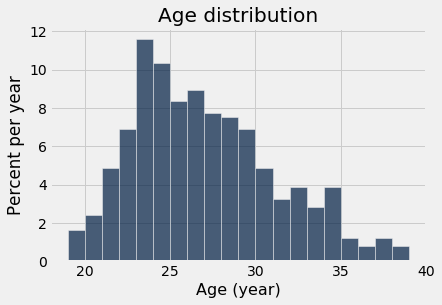

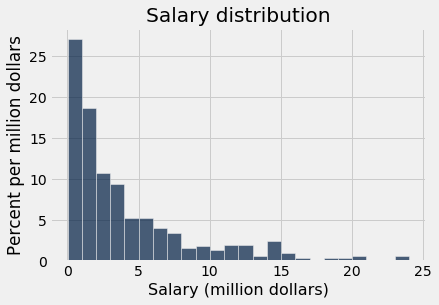

In [68]:
def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')/1000000
    t1 = t.drop('Salary').with_column('Salary', salaries)
    age_bins = np.arange(min(ages), max(ages) + 2, 1) 
    salary_bins = np.arange(min(salaries), max(salaries) + 1, 1)
    t1.hist('Age', bins=age_bins, unit='year')
    plt.title('Age distribution')
    t1.hist('Salary', bins=salary_bins, unit='million dollars')
    plt.title('Salary distribution') 
    
histograms(full_data)
print('Two histograms should be displayed below')

**Question 1**. Create a function called `compute_statistics` that takes a table containing ages and salaries and:
- Draws a histogram of ages
- Draws a histogram of salaries
- Returns a two-element array containing the average age and average salary (in that order)

You can call the `histograms` function to draw the histograms! 

*Note:* More charts will be displayed when running the test cell. Please feel free to ignore the charts.

<!--
BEGIN QUESTION
name: q31
-->

array([2.65365854e+01, 4.26977577e+06])

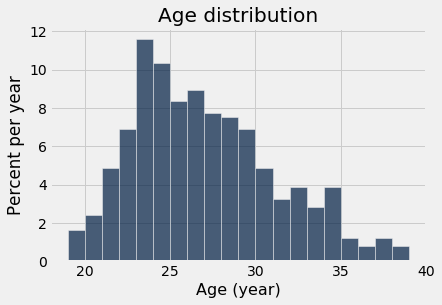

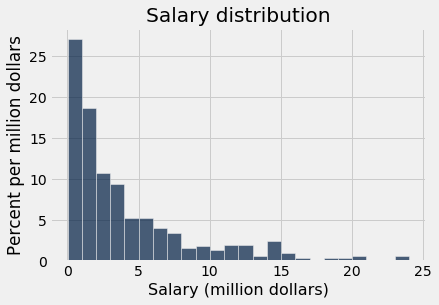

In [70]:
def compute_statistics(age_and_salary_data):
    histograms(age_and_salary_data)
    age = age_and_salary_data.column("Age")
    salary = age_and_salary_data.column("Salary")
    return make_array(np.average(age), np.average(salary))
    

full_stats = compute_statistics(full_data)
full_stats

In [71]:
ok.grade("q31");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Simple random sampling
A more justifiable approach is to sample uniformly at random from the players.  In a **simple random sample (SRS) without replacement**, we ensure that each player is selected at most once. Imagine writing down each player's name on a card, putting the cards in an box, and shuffling the box.  Then, pull out cards one by one and set them aside, stopping when the specified sample size is reached.

### Producing simple random samples
Sometimes, it’s useful to take random samples even when we have the data for the whole population. It helps us understand sampling accuracy.

### `sample`

The table method `sample` produces a random sample from the table. By default, it draws at random **with replacement** from the rows of a table. It takes in the sample size as its argument and returns a **table** with only the rows that were selected. 

Run the cell below to see an example call to `sample()` with a sample size of 5, with replacement.

In [73]:
# Just run this cell

salary_data.sample(5)

PlayerName,Salary
Kalin Lucas,507336
Henry Walker,196217
Bryce Cotton,92514
Donald Sloan,948163
Channing Frye,8579088


The optional argument `with_replacement=False` can be passed through `sample()` to specify that the sample should be drawn without replacement.

Run the cell below to see an example call to `sample()` with a sample size of 5, without replacement.

In [75]:
# Just run this cell

salary_data.sample(5, with_replacement=False)

PlayerName,Salary
Wayne Ellington,1063384
Nikola Pekovic,12100000
Jabari Parker,4930560
Al-Farouq Aminu,1100602
Steve Novak,3445947


**Question 5.** Produce a simple random sample of size 44 from `full_data`. Run your analysis on it again.  Run the cell a few times to see how the histograms and statistics change across different samples.

- How much does the average age change across samples? 
- What about average salary?

In [77]:
my_small_srswor_data = full_data
my_small_stats = my_small_srswor_data.sample(44)
my_small_stats

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
JaMychal Green,134295,24,TOT,24,45,4,5,5,14,62
Solomon Hill,1302840,23,IND,82,314,184,66,18,115,729
Channing Frye,8579088,31,ORL,75,293,94,47,39,78,549
James Young,1674480,19,BOS,31,42,13,8,2,5,105
Shannon Brown,1310286,29,MIA,5,1,3,4,0,4,20
Jordan Hill,9000000,27,LAL,70,556,103,34,52,106,841
J.J. Barea,1302578,30,DAL,77,134,263,33,1,70,580
Tyson Chandler,14846887,32,DAL,75,864,84,42,91,105,771
Mario Chalmers,4000000,28,MIA,80,206,307,122,10,173,813
Marreese Speights,3657500,27,GSW,76,325,72,20,34,82,791


*Write your answer here, replacing this text.*

**Question 6.** As in the previous question, analyze several simple random samples of size 100 from `full_data`.  
- Do the histogram shapes seem to change more or less across samples of 100 than across samples of size 44?  
- Are the sample averages and histograms closer to their true values/shape for age or for salary?  What did you expect to see?

In [78]:
my_large_srswor_data = full_data
my_large_stats = my_large_srswor_data.sample(100)
my_large_stats

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Al-Farouq Aminu,1100602,24,DAL,74,342,59,70,62,55,412
Mitch McGary,1400040,22,OKC,32,165,14,16,16,31,201
Jeff Withey,816482,24,NOP,37,64,11,4,18,12,98
Steve Novak,3445947,31,TOT,35,22,11,0,2,5,63
Wesley Johnson,981084,27,LAL,76,319,124,59,45,87,753
Deron Williams,19754465,30,BRK,68,237,448,64,17,154,884
Robin Lopez,6124729,26,POR,59,394,55,16,84,73,566
Roy Hibbert,14898938,28,IND,76,540,84,18,125,107,802
Tyler Ennis,1590720,20,TOT,33,35,73,18,5,42,121
Jeff Green,9445000,28,TOT,78,328,134,53,34,108,1168


*Write your answer here, replacing this text.*

Congratulations, you're done with Lab 5!  Be sure to 
- **Run all the tests** (the next cell has a shortcut for that). 
- **Save and Checkpoint** from the `File` menu.
- **Run the cell at the bottom to submit your work**.
- And ask one of the staff members to check you off.

In [79]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------

<string>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?


---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q34 > Suite 1 > Case 1

>>> prob_third_given_declared > 0.5
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q34 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



In [ ]:
_ = ok.submit()